In [15]:
pip install pandas numpy matplotlib seaborn scikit-learn tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [16]:
#Ica chintyasari
#import Library
import pandas as pd
import numpy as np
from numpy import array
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
)

from pylab import rcParams 
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [17]:
#Import Data
df = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


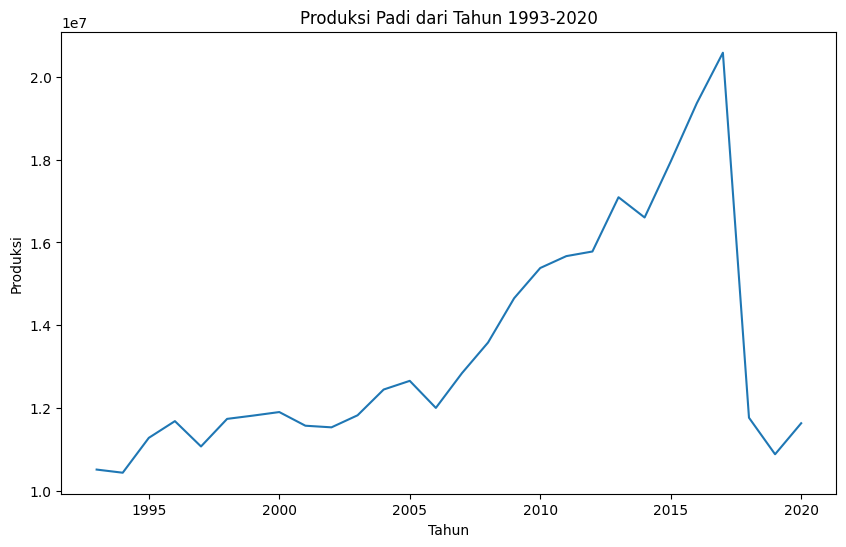

In [18]:
#Exploratory Data Analysis
#memvisualisasikan tren produksi beras dari waktu ke waktu. 
#Dengan mengelompokkan kumpulan data berdasarkan tahun, menjumlahkan produksi untuk setiap tahun, dan memplotnya, 
#kode membantu menganalisis bagaimana produksi beras telah berubah dari tahun 1993 hingga 2020.
plt.figure(figsize=(10,6))
df.groupby('Tahun')['Produksi'].sum().plot()
plt.xlabel('Tahun')
plt.ylabel('Produksi')
plt.title('Produksi Padi dari Tahun 1993-2020')
plt.show()

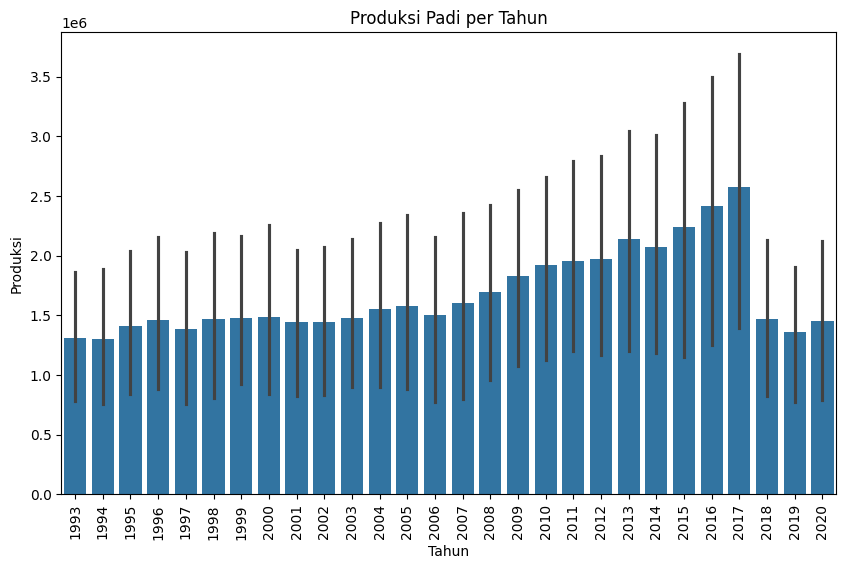

Produksi Padi per Tahun: 
 Tahun
1993    10511106.00
1994    10434879.00
1995    11277878.00
1996    11681931.00
1997    11069582.00
1998    11736390.00
1999    11816051.00
2000    11901379.00
2001    11571056.00
2002    11531731.00
2003    11823024.00
2004    12445839.00
2005    12655694.00
2006    12001280.00
2007    12841479.00
2008    13581940.00
2009    14652674.00
2010    15382976.00
2011    15670413.00
2012    15782225.00
2013    17093915.00
2014    16604009.00
2015    17956252.00
2016    19365875.90
2017    20586773.50
2018    11764423.68
2019    10881099.49
2020    11631123.08
Name: Produksi, dtype: float64


In [19]:
#membuat plot batang untuk memvisualisasikan total produksi beras per tahun dan menampilkan data numerik untuk produksi setiap tahun. 
plt.figure(figsize=(10,6))
sns.barplot(x=df['Tahun'],y=df['Produksi'])
plt.xlabel('Tahun')
plt.xticks(rotation=90)
plt.ylabel('Produksi')
plt.title('Produksi Padi per Tahun')
plt.show()
print('Produksi Padi per Tahun: \n',df.groupby('Tahun')['Produksi'].sum())

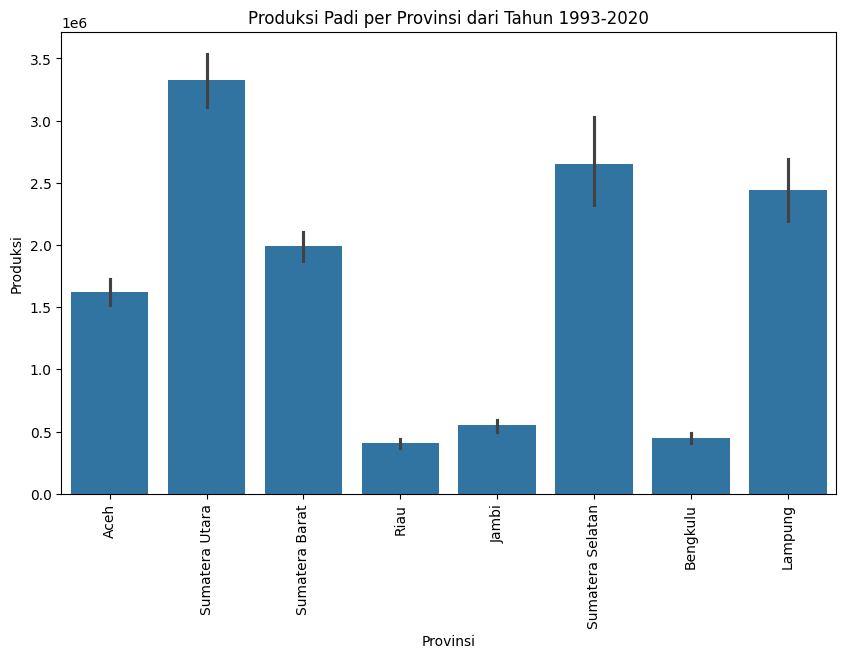

Produksi Padi per Provinsi dari Tahun 1993-2020: 
 Provinsi
Aceh                45324629.64
Bengkulu            12459015.75
Jambi               15480186.69
Lampung             68433897.53
Riau                11409006.55
Sumatera Barat      55731075.23
Sumatera Selatan    74161992.54
Sumatera Utara      93253194.72
Name: Produksi, dtype: float64


In [20]:
#membuat plot batang untuk memvisualisasikan produksi beras di berbagai provinsi dari tahun 1993 hingga 2020. 
plt.figure(figsize=(10,6))
sns.barplot(x=df['Provinsi'],y=df['Produksi'])
plt.xlabel('Provinsi')
plt.xticks(rotation=90)
plt.ylabel('Produksi')
plt.title('Produksi Padi per Provinsi dari Tahun 1993-2020')
plt.show()
print('Produksi Padi per Provinsi dari Tahun 1993-2020: \n',df.groupby('Provinsi')['Produksi'].sum())

<Figure size 1000x600 with 0 Axes>

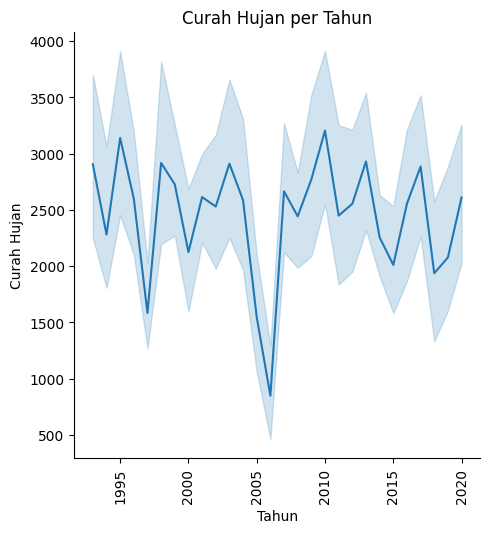

In [21]:
#membuat plot garis untuk memvisualisasikan tren curah hujan (Curah Hujan) selama bertahun-tahun (1993-2020).
plt.figure(figsize=(10,6))
sns.relplot(x=df['Tahun'],y=df['Curah hujan'],kind='line')
plt.xlabel('Tahun')
plt.xticks(rotation=90)
plt.ylabel('Curah Hujan')
plt.title('Curah Hujan per Tahun')
plt.show()

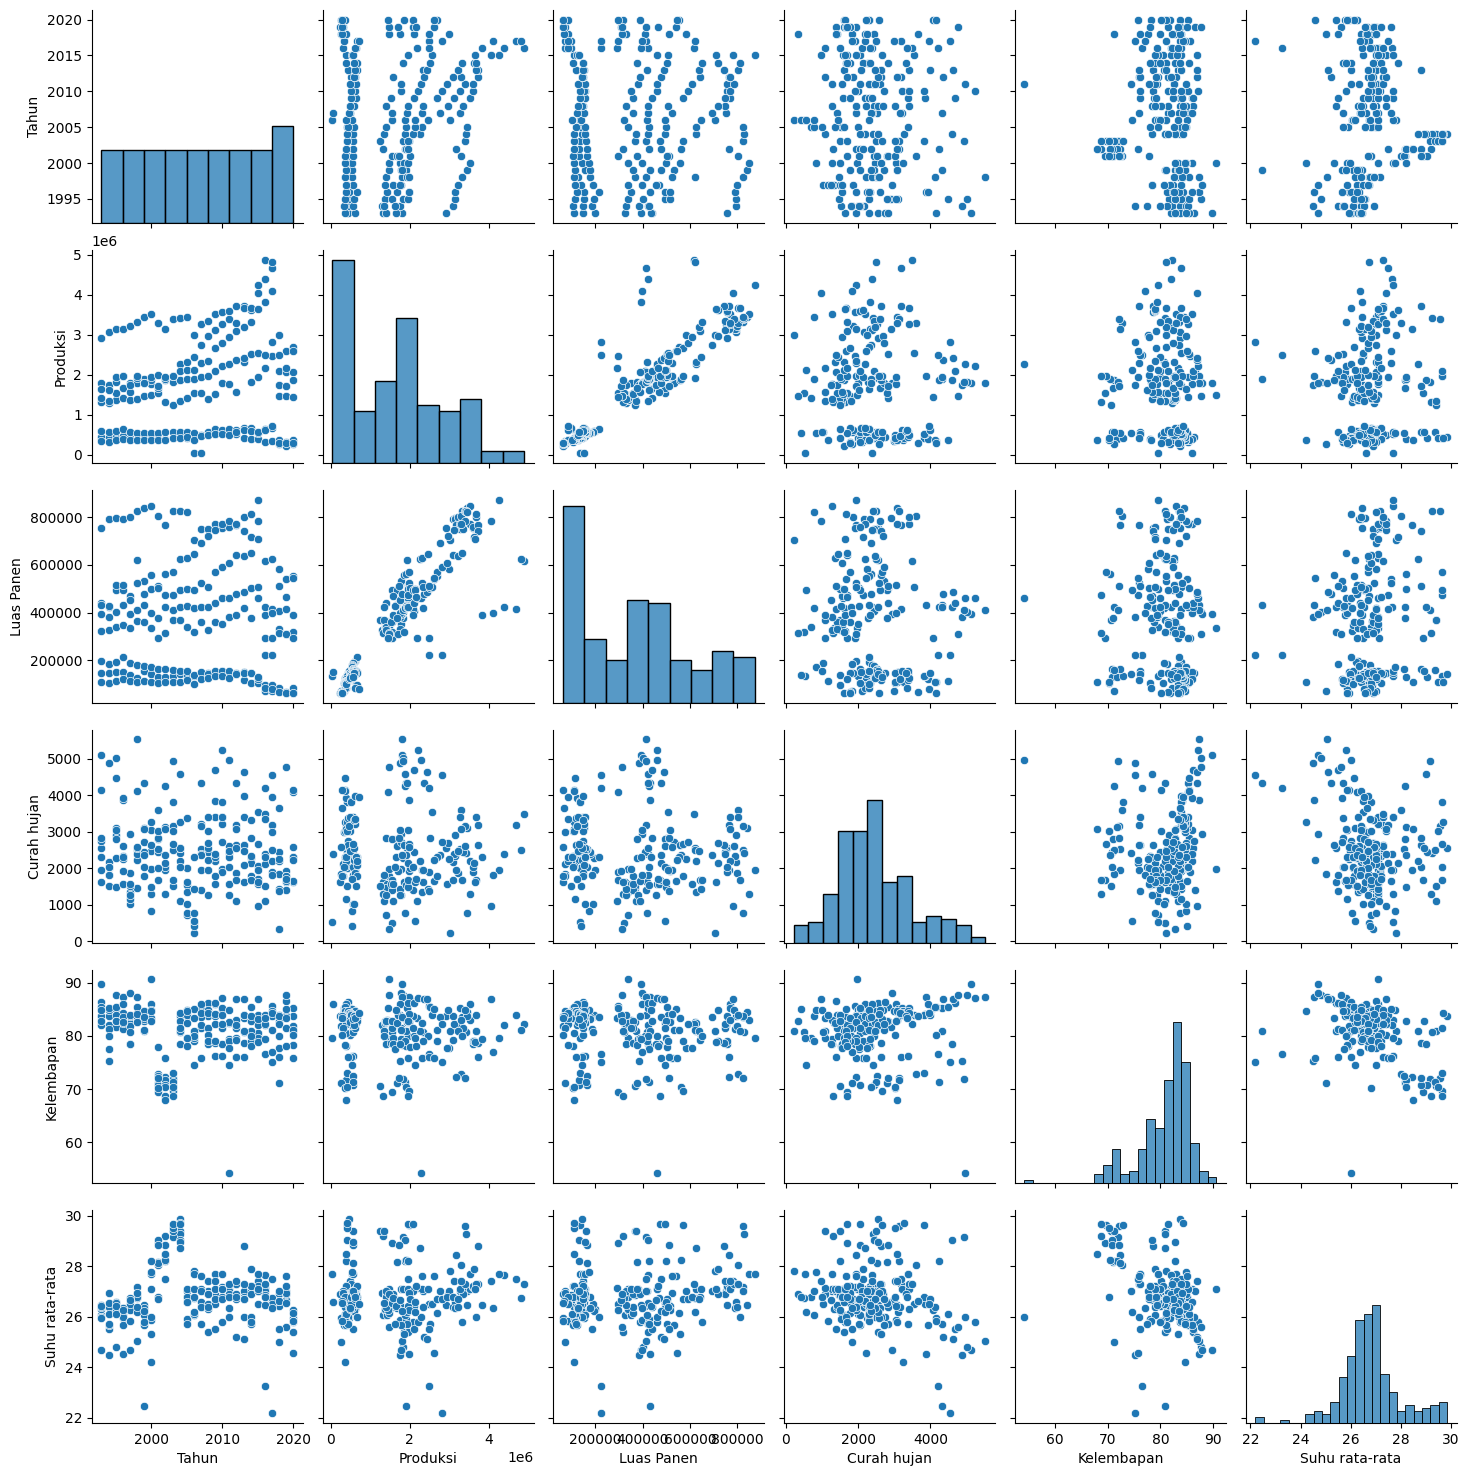

In [22]:
#memvisualisasikan hubungan antara variabel yang berbeda
#menampilkan histogram pada diagonal untuk menunjukkan distribusi setiap variabel
sns.pairplot(df)

<Axes: >

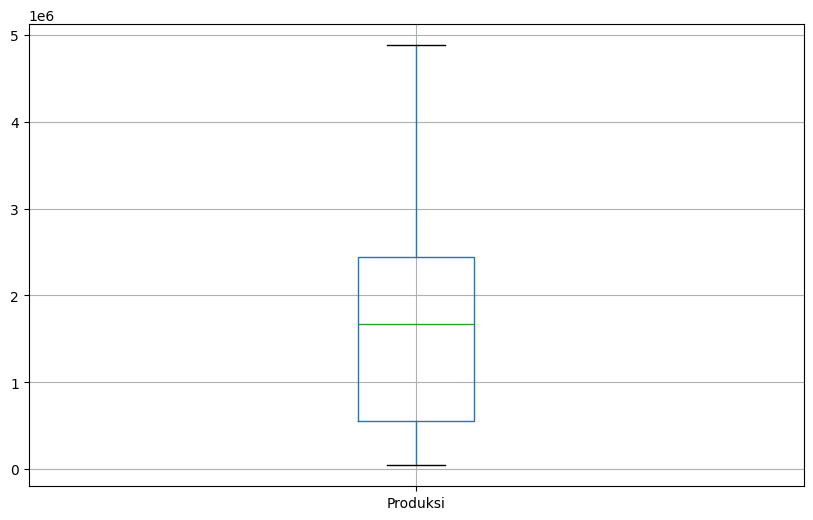

In [23]:
#cek outlier
df[['Produksi']].boxplot(figsize=(10,6))

In [24]:
#mengubah kolom order
cols = list(df.columns)
df = df.copy()
df = df[cols[1:2] + cols[3:7] + [cols[2]]]
df.tail()

,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
219,2016,390799.00,2317.6,79.40,26.45,3831923.00
220,2017,396559.00,1825.1,77.04,26.36,4090654.00
221,2018,511940.93,1385.8,76.05,25.50,2488641.91
222,2019,464103.42,1706.4,78.03,27.23,2164089.33
223,2020,545149.05,2211.3,75.80,24.58,2604913.29


In [25]:
df.corr()

,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
Tahun,1.000000,-0.045951,-0.047645,-0.033474,0.004923,0.182527
Luas Panen,-0.045951,1.000000,-0.092975,-0.061121,0.115726,0.905622
Curah hujan,-0.047645,-0.092975,1.000000,0.056466,-0.228699,-0.042129
Kelembapan,-0.033474,-0.061121,0.056466,1.000000,-0.407799,-0.052316
Suhu rata-rata,0.004923,0.115726,-0.228699,-0.407799,1.000000,0.041160
Produksi,0.182527,0.905622,-0.042129,-0.052316,0.041160,1.000000


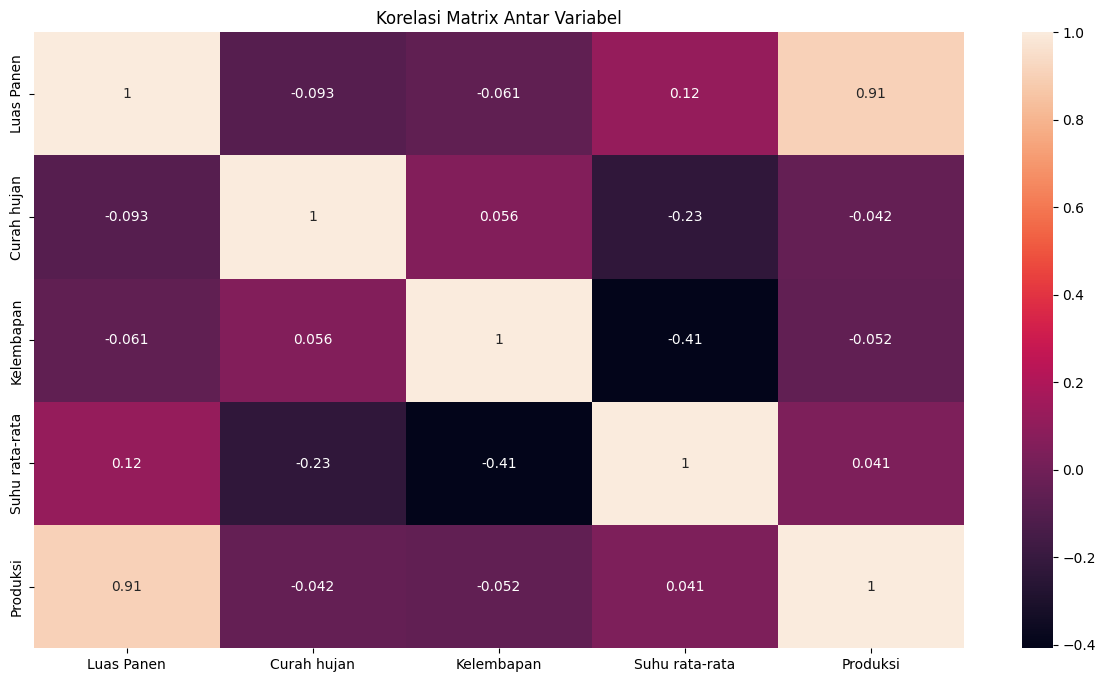

In [26]:
fig, ax = plt.subplots(figsize=(15,8), dpi=100)
sns.heatmap(df.loc[:,'Luas Panen':'Produksi'].corr(),annot=True)
plt.title('Korelasi Matrix Antar Variabel')
plt.show()

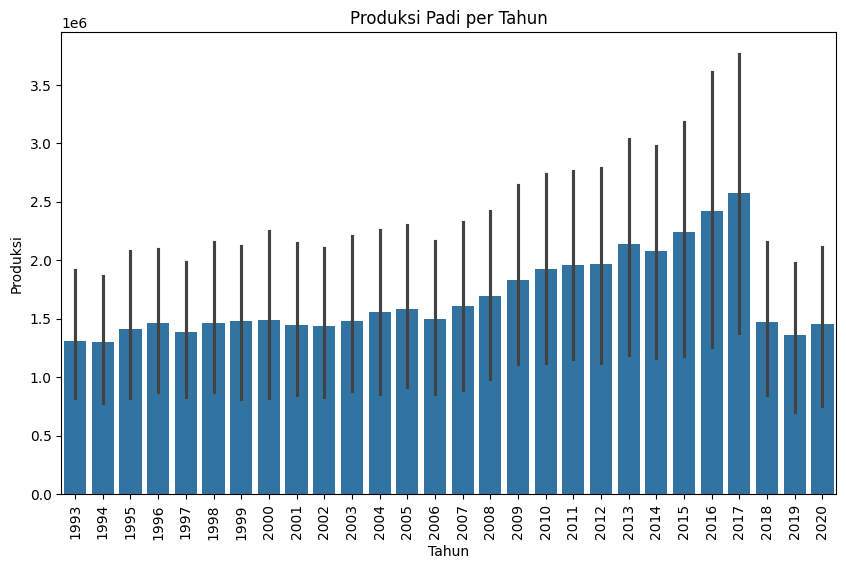

In [27]:
#Visualisasi
#Merencanakan Produksi selama Bertahun-tahun
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Tahun'], y=df['Produksi'])
plt.xlabel('Tahun')
plt.xticks(rotation=90)
plt.ylabel('Produksi')
plt.title('Produksi Padi per Tahun')
plt.show()


In [28]:
import pandas as pd # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # type: ignore
import joblib # type: ignore

# Load dataset
df = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')

# Prepare the features (X) and target (y)
X = df[['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']]
y = df['Produksi']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the trained model as a .sav file
joblib.dump(model, 'Tugas13.sav')

print("Model saved as Tugas13.sav")


Model saved as Tugas13.sav
